In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
healthy_epochs = mne.read_epochs('../processed_healthy_eeg-epo.fif')
schizo_epochs = mne.read_epochs('../processed_schizophrenic_eeg-epo.fif')

Reading d:\research-reservoir\Schizo-hormone\Test\..\processed_healthy_eeg-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    1996.00 ms
        0 CTF compensation matrices available
Not setting metadata
13016 matching events found
No baseline correction applied
0 projection items activated
Reading d:\research-reservoir\Schizo-hormone\Test\..\processed_schizophrenic_eeg-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    1996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15819 matching events found
No baseline correction applied
0 projection items activated


In [3]:
filtered_channels = [
    name for name in healthy_epochs.ch_names if name.startswith('F')]
print(filtered_channels)

['Fp2', 'F8', 'Fp1', 'F7', 'F4', 'F3', 'Fz']


Using matplotlib as 2D backend.


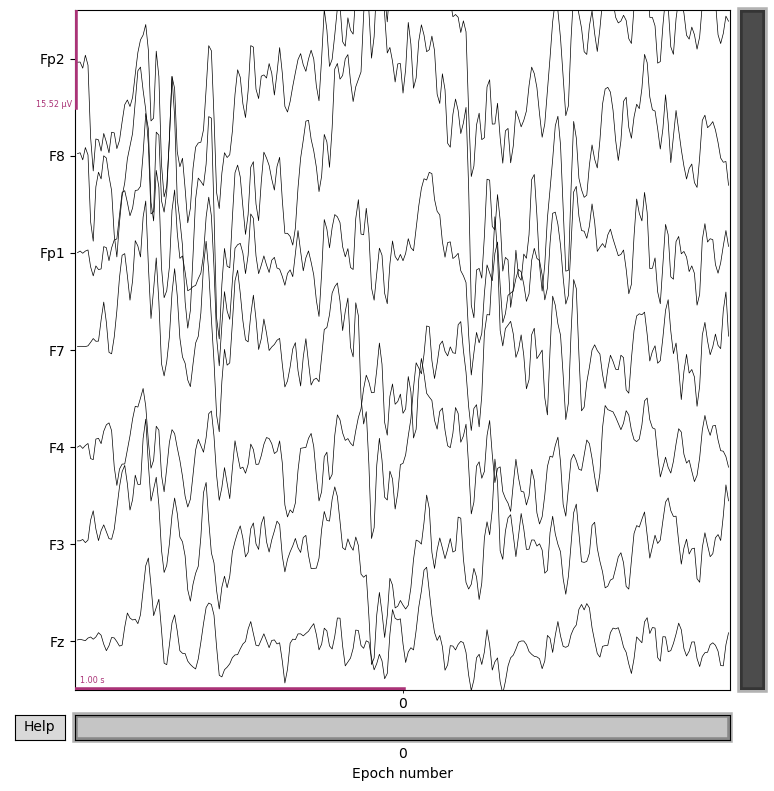

In [4]:
healthy_epochs.pick(filtered_channels)[:1].plot(n_channels=len(filtered_channels), scalings='auto', title="Frontal eeg signals", show=True);


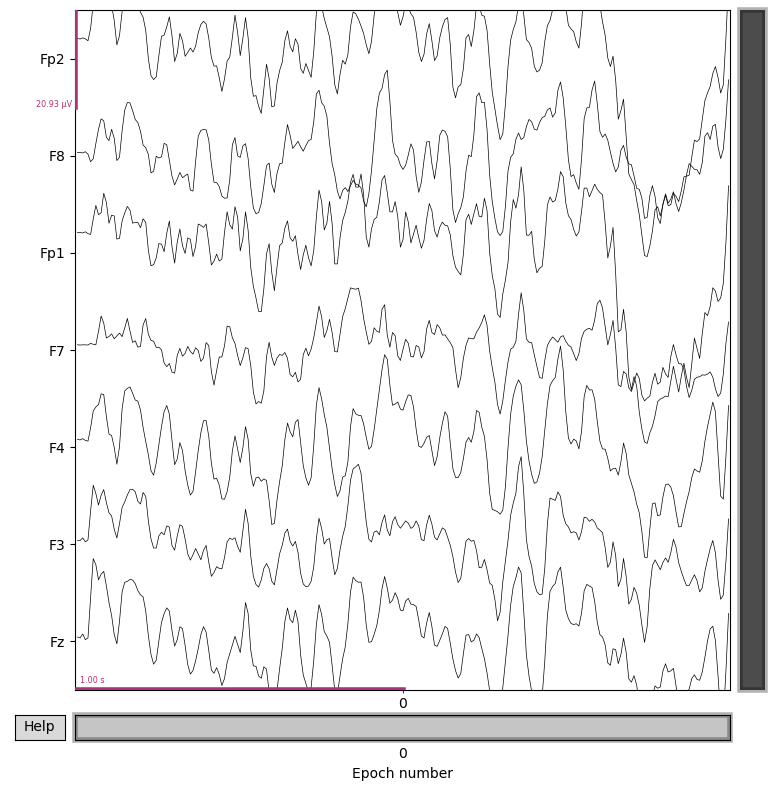

In [5]:
schizo_epochs.pick(filtered_channels)[:1].plot(n_channels=len(filtered_channels), scalings='auto', title="Frontal eeg signals", show=True);

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\anisr\AppData\Local\Temp\ipykernel_1648\2633703032.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.pick_channels(filtered_channels).plot_psd(


<Figure size 1000x600 with 0 Axes>

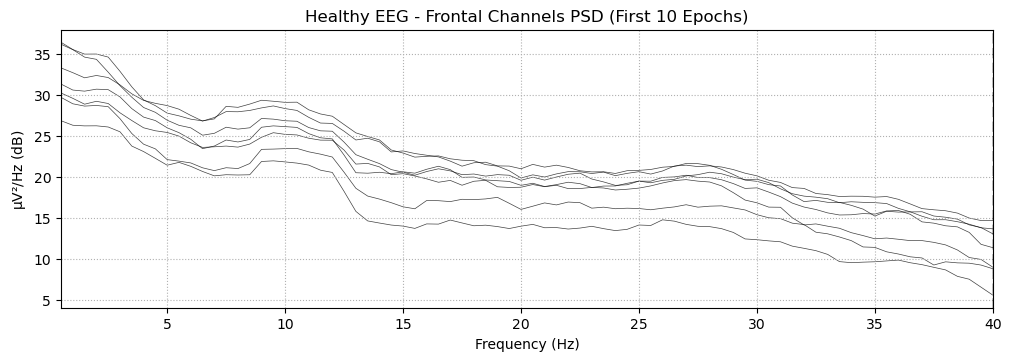

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\anisr\AppData\Local\Temp\ipykernel_1648\2633703032.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.pick_channels(filtered_channels).plot_psd(


<Figure size 1000x600 with 0 Axes>

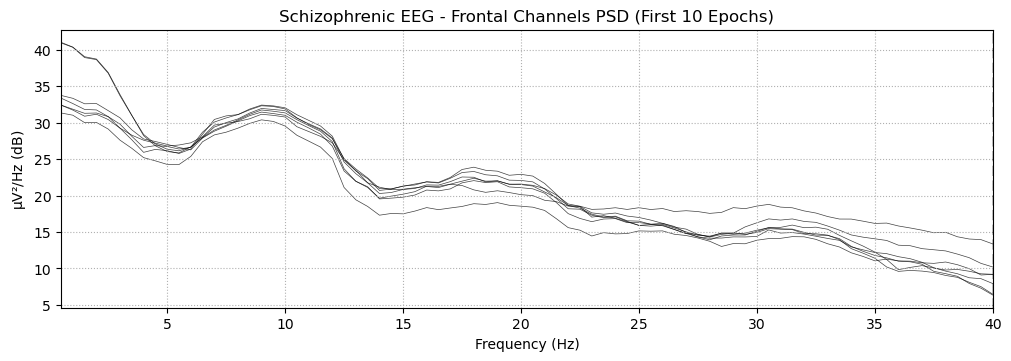

In [6]:
def plot_frontal_psd(epochs, title='Frontal Power Spectral Density'):
    plt.figure(figsize=(10, 6))
    epochs.pick_channels(filtered_channels).plot_psd(
        fmin=0.1, fmax=40., show=False)
    plt.title(title)
    plt.show()


plot_frontal_psd(healthy_epochs[:10],
                 title='Healthy EEG - Frontal Channels PSD (First 10 Epochs)')
plot_frontal_psd(schizo_epochs[:10],
                 title='Schizophrenic EEG - Frontal Channels PSD (First 10 Epochs)')

In [7]:
X_healthy = healthy_epochs.get_data().reshape(len(healthy_epochs), -1)
X_schizo = schizo_epochs.get_data().reshape(len(schizo_epochs), -1)

C:\Users\anisr\AppData\Local\Temp\ipykernel_1648\149151824.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_healthy = healthy_epochs.get_data().reshape(len(healthy_epochs), -1)
C:\Users\anisr\AppData\Local\Temp\ipykernel_1648\149151824.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X_schizo = schizo_epochs.get_data().reshape(len(schizo_epochs), -1)


In [8]:
y_healthy = np.zeros(X_healthy.shape[0])
y_schizophrenic = np.ones(X_schizo.shape[0])

In [9]:
X = np.vstack((X_healthy, X_schizo))
y = np.concatenate((y_healthy, y_schizophrenic))

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [12]:
param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20],
    },
    {
        'classifier': [SVC(random_state=42)],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [0.1, 1],
        'classifier__gamma': ['auto']
    }
]

In [13]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 